Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "me myself and I"

---

In [2]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import time

# HW 7:  Intro to Linear Algebra



# Linear Algebra: Part 1

## Question 1: Matrix Norms and Condition Numbers

Consider the Matrices

$$
    A = \begin{bmatrix} 1 & 1 \\
                        1 & a \\
         \end{bmatrix} \quad\quad
     A^{-1} = \frac{1}{a-1}\begin{bmatrix} a & -1 \\
                        -1 & 1 \\
         \end{bmatrix} 
$$
where $a\in\mathbb{R}$

**(a)** [6] Analytically calculate, as a function of $a$

* the induced $p$-norm $||A||_p$ 
* the $p$ condition number $\kappa_p(A) =||A||_p||A^{-1}||_p$ 

consider  $p=1,2,\infty$

(hint: for a symmetric matrix, the singular values are equal to the absolute value of the eigenvalues of $A$ (sorted from largest to smallest))

### Answer to Question 1(a)

#### $p$ = 1

By definition, if we want to compute 1-norm, for each column $A_i$ of matrix $A$, 1-norm is $\sum_j|A_{i,j}|$.

$$
    ||A||_1 = \sup_{x \in \mathbb{R}^n} \left( ||A \cdot [1, 0]^T||_1, ||A \cdot [0, 1]^T||_1 \right )
$$

Then we know $1$-norm of $A$ = $\max(2, 1+|a|)$

#### $p$ = 2

When $p = 2$, the induced matrix norm is the spectral norm. The spectral norm of a matrix A is the largest singular value of A i.e. the square root of the largest eigenvalue of the matrix $A^*A$, where $A^*$ donates the conjugate transpose of A

The eigenvalues of matrix A are:

$$
\begin{aligned}
\lambda_1 &= \frac{1}{2} (-\sqrt{a^2 - 2 a + 5} + a + 1) \\
\lambda_2 &= \frac{1}{2} (\sqrt{a^2 - 2 a + 5} + a + 1) 
\end{aligned}
$$

Then $||A||_2 = \max(|\lambda_1|,|\lambda_2|)$


#### $p$ = $\infty$

If we want to calculate the $p = \infty$-norm $||A||_p$, it is the same as $||A||_1$, which means $$||A||_{\infty} = \max_{1\leq i \leq m}\sum_{j=1}^n|a_{ij}| = \max(2, 1+|a|)$$


####  $p$ Condition Number

If we want to calculate $\kappa_1(A)$, or $\kappa_\infty(A)$, we can just calculate the

$$
\max \left(\frac{(|a|+1)^2}{|a-1|}, \frac{4}{|a-1|} \right)
$$

If we want to calculate $\kappa_2(A)$, all we need to do is calculating $$
\kappa_2(A) = \max(|\lambda_1|,|\lambda_2|) \cdot \max(|\lambda_3|,|\lambda_4|)
$$

**(b)** [6] write two short python routine that returns $||A||_p$, and $\kappa_p(A)$ for the matrices in part (a). Again, just consider $p=1,2,\infty$) and raise a ValueError if $p$ is any other value.

In [3]:
def mypnorm(a, p ):
    """
    return ||A||_p for A = [[ 1, 1],
                            [ 1, a]]
                            
    for p=1, 2, or numpy.infty
    
    parameters:
    -----------
    
    a: scalar 
        value of a
    p: scalar
        1, 2 or np.infty
    returns:
    --------
    pnorm(a)
    
    raises:
    --------
    ValueError:  if p is not in [ 1, 2, numpy.infty]
    """
    if p not in [1,2,numpy.infty]:
        raise ValueError()
    
    
    lambda1 = numpy.abs(0.5*(numpy.sqrt(a**2-2*a+5)+a+1))
    lambda2 = numpy.abs(0.5*(-numpy.sqrt(a**2-2*a+5)+a+1))
    
    if p==1 or p==numpy.infty:
        return numpy.max([2,1+abs(a)])
    
    elif p==2:
        return numpy.max([lambda1,lambda2])
    
    
def mycond(a, p):
    """
    write your own docstring to return the condition number
    """
    
    if p not in [1,2,numpy.infty]:
        raise ValueError()
    
    
    lambda1 = numpy.abs(0.5*(numpy.sqrt(a**2-2*a+5)+a+1))
    lambda2 = numpy.abs(0.5*(-numpy.sqrt(a**2-2*a+5)+a+1))
    lambda3 = numpy.abs((numpy.sqrt(a**2-2*a+5)+a+1) / (2*(a-1)))
    lambda4 = numpy.abs((-numpy.sqrt(a**2-2*a+5)+a+1) / (2*(a-1)))
    
    a1 = abs(a/(a-1))
    a2 = 1/abs(a-1)
   
    if p==1 or p==numpy.infty:
        return numpy.max([2,1+abs(a)]) * numpy.max([a1+a2, 2*a2])
    elif p==2:
        return (max(lambda1,lambda2)*max(lambda3,lambda4))
          

In [4]:
A = lambda a: numpy.array([ [ 1, 1], [1, a]])
aa = numpy.array([ -2, 0, 1.0001, 2])


for p in [ 1, 2, numpy.infty]:
    normp = [ mypnorm(a, p) for a in aa]
    test = [ numpy.linalg.norm(A(a), ord=p) for a in aa]    
    print('||A||_{} = {}'.format(p, normp))
    numpy.testing.assert_allclose(normp,test)
print('Successful Norm test')

for p in [ 1, 2, numpy.infty]:
    condp = [ mycond(a, p) for a in aa]
    test = [ numpy.linalg.cond(A(a), p) for a in aa]    
    print('k(A)_{} = {}'.format(p, condp))
    numpy.testing.assert_allclose(condp,test)
print('Successful condition number test')

# test the exception
try:
    mypnorm(0.,4)
except ValueError as err:
    print('Success: you caught the ValueError')
else:
    assert False, 'whoops, missed the exception'


||A||_1 = [3.0, 2.0, 2.0000999999999998, 3.0]
||A||_2 = [2.302775637731995, 1.618033988749895, 2.00005000125, 2.618033988749895]
||A||_inf = [3.0, 2.0, 2.0000999999999998, 3.0]
Successful Norm test
k(A)_1 = [3.0, 4.0, 40004.0001000044, 9.0]
k(A)_2 = [1.7675918792439984, 2.618033988749895, 40002.00007500565, 6.854101966249685]
k(A)_inf = [3.0, 4.0, 40004.0001000044, 9.0]
Successful condition number test
Success: you caught the ValueError


 **(c)** [4] Make a plot comparing $\log(\kappa(A))$ vs $a$ for the different matrix norms over the range $a\in[-15,15]$. (you can check it by plotting `numpy.linalg.cond(A, ord)` as well. As always, make it pretty.

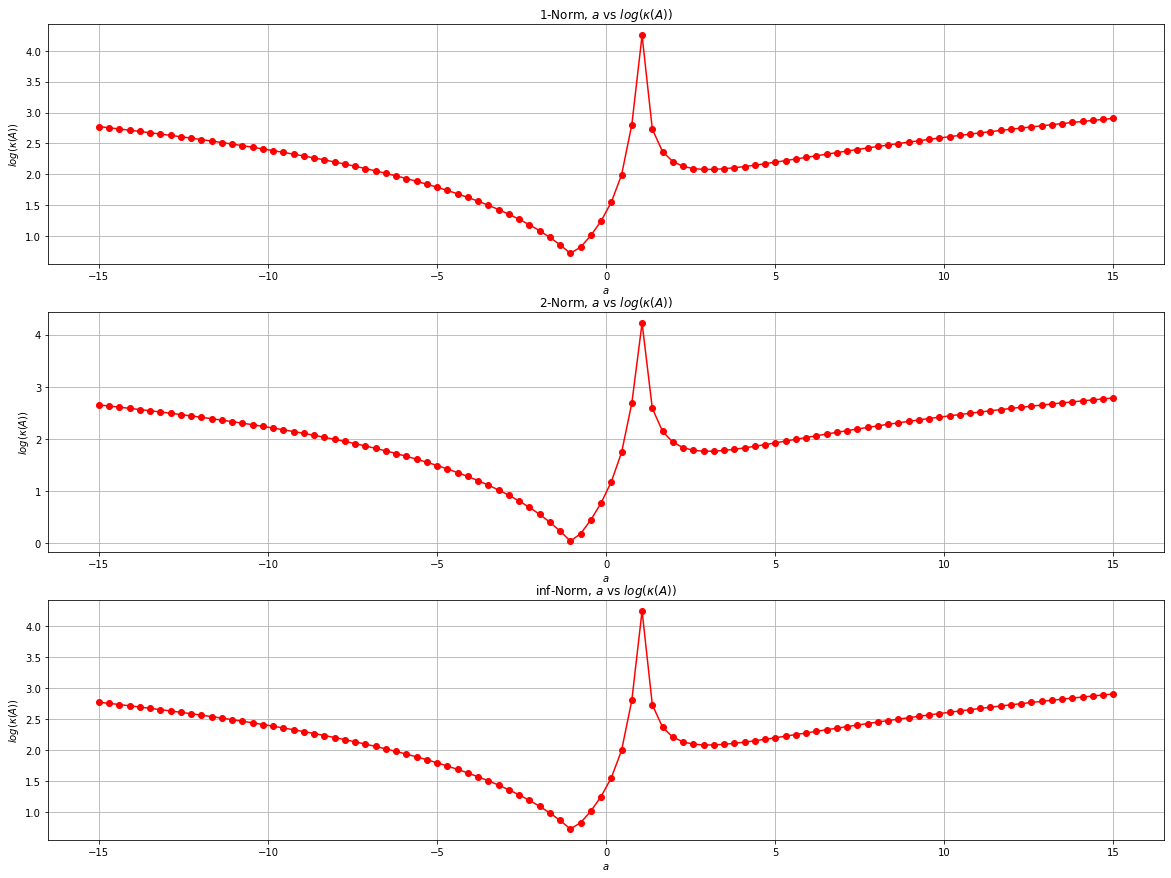

In [5]:
a = numpy.linspace(-15,15,100)
# a = numpy.delete(a, 16)
fig = plt.figure(figsize=(20,15))
log = numpy.zeros((len(a),3))
p = [ 1, 2, numpy.infty]
for t in range(3):
    for idx, k in enumerate(a):
        log[idx,t] = numpy.log(mycond(k,p[t]))

for i in range(3):
    axes = fig.add_subplot(3,1,i+1)
    axes.plot(a,log[:,i],'ro-')
    
    axes.grid()
    axes.set_title("{}-Norm, $a$ vs $log(\kappa(A))$".format(p[i]))
    axes.set_xlabel('$a$')
    axes.set_ylabel('$log(\kappa(A))$')




**(d)** [8] Given your plot comment on the following:
* What value of $a$ gives the best conditioned matrix.  Why?
* What value of $a$ gives the least well-condition matrix.  Why?
* Does it matter which norm we measure the condition number in?
* What value of $a$ gives the best conditioned matrix for $a>1$
 

#### Answer to Question 1(d)

We can know that $a = -1$ will get the best conditioned matrix

When $a = 1$, we get the least conditioned matrix. 

Yes it matters, we can know the ranges of three $\log(\kappa(A))$s are different even though they have almost the same shape.

When $a>1$, we can get the best conditioned matrix by setting $a = 3$ 

## Question 2: Conditioning and LU factorization

Consider the two identical linear problems $A\mathbf{x}=\bf{b}$

$$
    \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix}\mathbf{x}=\begin{bmatrix} 1\\ 2\end{bmatrix} \quad\quad
     \begin{bmatrix} 1 & 1 \\\epsilon & 1 \\ \end{bmatrix}\mathbf{x}=\begin{bmatrix} 2\\ 1\end{bmatrix} 
$$
where $\epsilon \ll \epsilon_{mach}$

**(a)**  [6 pts] Find the 1 condition number of both matrices. Are they the same?  Are these matrices well conditioned? Check your answer using numpy with $\epsilon = 0.1\epsilon_{mach}$

#### Answer to Question 2 (a)

Since $\epsilon \ll \epsilon_{mach}$, we know the 1-norm of both matrixs $A_1$ equal to 2. We then need to invert $A_1$ and $A_2$.

We first invert $A_1$ and $A_2$ and get 

$$
A_1^{-1} = \frac{1}{\epsilon - 1}\begin{bmatrix} 1 & -1 \\ -1 & \epsilon \\ \end{bmatrix}
$$

$$
A_2^{-1} = \frac{1}{1 - \epsilon}\begin{bmatrix} 1 & -1 \\ -\epsilon & 1 \\ \end{bmatrix}
$$

Then we know when $p = 1$, $||A_1^{-1}||_1 = ||A_2^{-1}||_1 = \frac{2}{1-\epsilon}$

$$
\kappa_1(A_1) = ||A_1||_1 ||A_1^{-1}||_1 = \frac{4}{1-\epsilon}\\
\kappa_1(A_2) = ||A_2||_1 ||A_2^{-1}||_1 = \frac{4}{1-\epsilon}
$$

We know $\epsilon$ is a very small number and $\frac{4}{1-\epsilon}$ is a number larger than 1, so we know these 2 matrices are not well-conditioned

In [6]:
eps = 0.1 * numpy.finfo(float).eps
A_1 = numpy.array([ [eps, 1], [1, 1] ])
A_2 = numpy.array([ [1, 1], [eps, 1] ])
condA_1 = numpy.linalg.cond(A_1)
condA_2 = numpy.linalg.cond(A_2)

print(condA_1, condA_2)


2.6180339887498953 2.6180339887498953


**(b)**  [4 pts] Find the analytic solution to both problems in infinite precision.  Are they the same?

#### Answer to Question 2(b)

For the first equation:
$$
\begin{aligned}
\mathbf{x_1} &= A_1^{-1}\begin{bmatrix} 1\\ 2\end{bmatrix}\\
&=\begin{bmatrix} \epsilon & 1 \\ 1 & 1 \\ \end{bmatrix}^{-1} \begin{bmatrix} 1\\ 2\end{bmatrix}\\
&=\frac{1}{\epsilon - 1}\begin{bmatrix} 1 & -1 \\ -1 & \epsilon \\ \end{bmatrix} \begin{bmatrix} 1\\ 2\end{bmatrix}\\
&=\frac{1}{\epsilon - 1}\begin{bmatrix} -1 \\ 2\epsilon -1\end{bmatrix}
\end{aligned}
$$




For the second equation:


$$
\begin{aligned}
\mathbf{x_2} &= A_2^{-1}\begin{bmatrix} 2\\ 1\end{bmatrix}\\
&=\begin{bmatrix} 1 & 1 \\ \epsilon & 1 \\ \end{bmatrix}^{-1} \begin{bmatrix} 2\\ 1\end{bmatrix}\\
&=\frac{1}{1 - \epsilon}\begin{bmatrix} 1 & -1 \\ -\epsilon & 1 \\ \end{bmatrix} \begin{bmatrix} 2\\ 1\end{bmatrix}\\
&=\frac{1}{\epsilon - 1}\begin{bmatrix} -1 \\ 2\epsilon -1\end{bmatrix}
\end{aligned}
$$

They are the same


**(c)**  [4 pts] Now solve both problems analytically using the $LU$ decomposition *without pivoting* but applying the rules of floating point math.  Do you get the same answer?  

#### Answer to Question 2 (c)

After applying the $LU$ decomposition on matrix $A_1$ and $A_2$, we get:

$$
L_1U_1 = \begin{bmatrix} 1 & 0\\ \frac{1}{\epsilon} & 1\end{bmatrix}\begin{bmatrix} \epsilon & 1\\ 0 & 1-\frac{1}{\epsilon}\end{bmatrix}\\
L_2U_2 = \begin{bmatrix} 1 & 0\\ \epsilon & 1\end{bmatrix}\begin{bmatrix} 1 & 1\\ 0 & 1-\epsilon\end{bmatrix}
$$

In order to solve $\mathbf{x_1}$ and $\mathbf{x_2}$, we do the following calculation:

$$
\begin{aligned}
\mathbf{A} \mathbf{x} &=\mathbf{b} \\
\mathbf{L U} \mathbf{x} &=\mathbf{b} \\
\mathbf{U} \mathbf{x} &=\mathbf{L}^{-1} \mathbf{b} \\
\mathbf{x} &=\mathbf{U}^{-1}\left(\mathbf{L}^{-1} \mathbf{b}\right)
\end{aligned}
$$


$$
\mathbf{x_1} =\frac{1}{1- \epsilon}\begin{bmatrix} 0 \\ 1\end{bmatrix}\\
\mathbf{x_2} = \frac{1}{(\epsilon - 1)^2}\begin{bmatrix} 1 \\  1\end{bmatrix}
$$


They are different

**(d)**  [6 pts] Check your solutions using numpy.  

For each problem 
* Calculate the solution using $L\mathbf{c}=\mathbf{b}$, $U\mathbf{x}=\mathbf{c}$ for each pair of $L,U$ derived above (you can use numpy here with $\epsilon=0.1\epsilon_{mach}$)
* Calculate the 1-condition number for each $L$ and $U$ 

Briefly explain these results


In [7]:
eps = 0.1 * numpy.finfo(float).eps

L_1 = numpy.array([ [1, 0], [1/eps, 1] ])
U_1 = numpy.array([ [eps, 1], [0, 1-1/eps] ])
b_1 = numpy.array([ 1, 2 ])

L_2 = numpy.array([ [1, 0], [eps, 1] ])
U_2 = numpy.array([ [1, 1], [0, 1-eps] ])
b_2 = numpy.array([ 2, 1 ])

c_1 = numpy.linalg.solve(L_1, b_1)
c_2 = numpy.linalg.solve(L_2, b_2)

x_1 = numpy.linalg.solve(U_1, c_1)
x_2 = numpy.linalg.solve(U_2, c_2)

print('x_1 is {}'.format(x_1))
print('x_2 is {}'.format(x_2))

condL_1 = numpy.linalg.cond(L_1)
condU_1 = numpy.linalg.cond(U_1)

condL_2 = numpy.linalg.cond(L_2)
condU_2 = numpy.linalg.cond(U_2)

print('condition number of L_1:', condL_1)
print('condition number of L_2:', condL_2)
print('condition number of U_1:', condU_1)
print('condition number of U_2:', condU_2)


x_1 is [0. 1.]
x_2 is [1. 1.]
condition number of L_1: inf
condition number of L_2: 1.0
condition number of U_1: 2.028240960365167e+33
condition number of U_2: 2.6180339887498953


Since for the first $U_1$, the pivot number is $\epsilon$, which is a relatively small number that close to zero, that makes my results different using numpy. An $\epsilon$ pivor number is very different from a 0 pivot number